# Análisis de auctions.csv

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('max_columns', 8, 'max_rows', 10)

## Limpieza del data frame

In [3]:
# La lectura es lenta y require mucha memoria
# Es mejor leer el DataFrame en la sección siguiente directamente
auctions = pd.read_csv('data/auctions.csv.gzip', compression='gzip', low_memory=False, parse_dates = ['date'])
auctions.head()

,auction_type_id,country,date,device_id,platform,ref_type_id,source_id
0,NaN,6333597102633388268,2019-03-11 14:18:33.290763,6059599345986491085,1,1,0
1,NaN,6333597102633388268,2019-03-11 14:18:34.440157,1115994996230693426,1,1,0
2,NaN,6333597102633388268,2019-03-11 14:18:35.862360,7463856250762200923,1,1,0
3,NaN,6333597102633388268,2019-03-11 14:18:36.167163,7829815350267792040,1,1,0
4,NaN,6333597102633388268,2019-03-11 14:18:37.728590,1448534231953777480,1,1,0


In [4]:
auctions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19571319 entries, 0 to 19571318
Data columns (total 7 columns):
auction_type_id    float64
country            int64
date               datetime64[ns]
device_id          int64
platform           int64
ref_type_id        int64
source_id          int64
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 1.0 GB


In [5]:
auctions['platform'].value_counts()

1    15541825
2     4029494
Name: platform, dtype: int64

In [6]:
auctions['ref_type_id'].value_counts()

1    15541825
7     4029494
Name: ref_type_id, dtype: int64

In [7]:
auctions['source_id'].value_counts()

0    13354597
1     4016739
5     1466494
2      582083
6      151406
Name: source_id, dtype: int64

In [8]:
auctions['source_id'] = auctions['source_id'].astype(np.uint8)
auctions['platform'] = auctions['platform'].astype(np.uint8)
auctions['ref_type_id'] = auctions['ref_type_id'].astype(np.uint8)

In [9]:
auctions['country'].value_counts()

6333597102633388268    19571319
Name: country, dtype: int64

In [10]:
auctions['auction_type_id'].isnull().all()

True

In [11]:
auctions = auctions.drop('country', axis=1)
auctions = auctions.drop('auction_type_id', axis=1)
auctions.head()

,date,device_id,platform,ref_type_id,source_id
0,2019-03-11 14:18:33.290763,6059599345986491085,1,1,0
1,2019-03-11 14:18:34.440157,1115994996230693426,1,1,0
2,2019-03-11 14:18:35.862360,7463856250762200923,1,1,0
3,2019-03-11 14:18:36.167163,7829815350267792040,1,1,0
4,2019-03-11 14:18:37.728590,1448534231953777480,1,1,0


In [12]:
auctions['date'] = auctions['date'].astype("datetime64")

In [13]:
auctions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19571319 entries, 0 to 19571318
Data columns (total 5 columns):
date           datetime64[ns]
device_id      int64
platform       uint8
ref_type_id    uint8
source_id      uint8
dtypes: datetime64[ns](1), int64(1), uint8(3)
memory usage: 354.6 MB


In [14]:
auctions.head()

,date,device_id,platform,ref_type_id,source_id
0,2019-03-11 14:18:33.290763,6059599345986491085,1,1,0
1,2019-03-11 14:18:34.440157,1115994996230693426,1,1,0
2,2019-03-11 14:18:35.862360,7463856250762200923,1,1,0
3,2019-03-11 14:18:36.167163,7829815350267792040,1,1,0
4,2019-03-11 14:18:37.728590,1448534231953777480,1,1,0


In [15]:
len(auctions)

19571319

## Lectura y limpieza en un paso del dataframe

In [16]:
types = {'platform': np.uint8, 'ref_type_id': np.uint8, 'source_id': np.uint8, 'device_id': np.uint64}
auctions = pd.read_csv('data/auctions.csv.gzip', compression='gzip', low_memory=False, dtype=types,
                       parse_dates=['date'], index_col=['date'],
                       usecols=['date', 'platform', 'ref_type_id', 'source_id', 'device_id'])
auctions.head()

,device_id,platform,ref_type_id,source_id
date,,,,
2019-03-11 14:18:33.290763,6059599345986491085,1,1,0
2019-03-11 14:18:34.440157,1115994996230693426,1,1,0
2019-03-11 14:18:35.862360,7463856250762200923,1,1,0
2019-03-11 14:18:36.167163,7829815350267792040,1,1,0
2019-03-11 14:18:37.728590,1448534231953777480,1,1,0


In [17]:
auctions.isnull().any()

device_id      False
platform       False
ref_type_id    False
source_id      False
dtype: bool

## Análisis exploratorio

In [18]:
# Ordenamos el índice para acelerar las operaciones
auctions.sort_index()

,device_id,platform,ref_type_id,source_id
date,,,,
2019-03-05 00:52:33.352526,693613851330160675,1,1,0
2019-03-05 00:52:40.105398,9063949842367241188,2,7,0
2019-03-05 00:52:45.092232,2824300781193788917,1,1,0
2019-03-05 00:52:46.102552,4395616356137861817,1,1,0
2019-03-05 00:52:47.151640,874322742462616406,1,1,0
...,...,...,...,...
2019-03-13 23:59:59.949856,7965034466442390044,1,1,0
2019-03-13 23:59:59.960218,6386682566476132934,1,1,0
2019-03-13 23:59:59.985544,3115724367270077496,1,1,0


In [19]:
# Veamos cuántas subastas hay en promedio por día
daily_auctions = auctions.resample('D').size()
daily_auctions.mean()

2174591.0

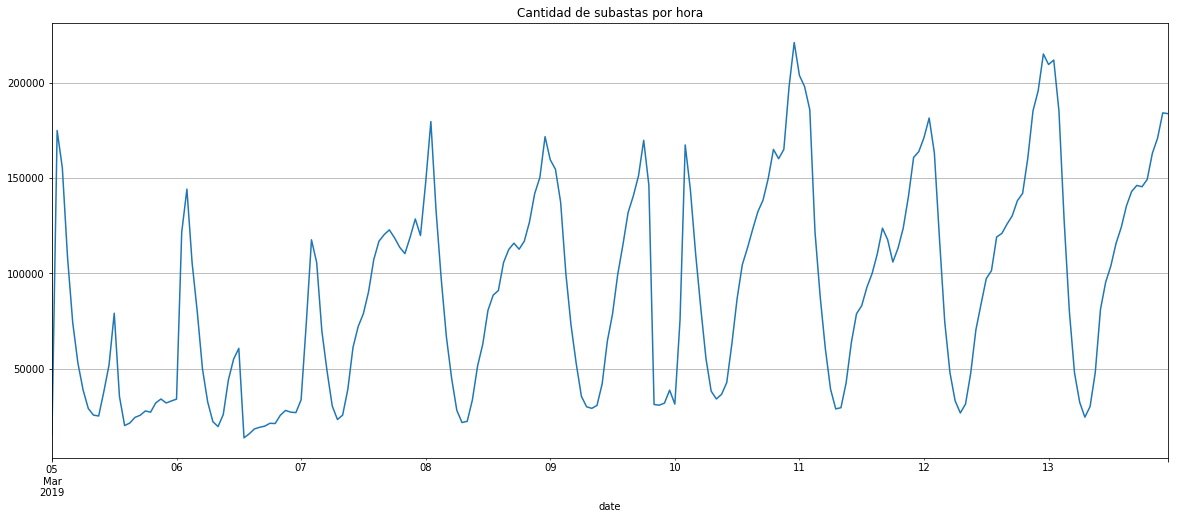

In [20]:
hourly_auctions = auctions.resample('H').size()
hourly_auctions.plot(kind='line', figsize=(20, 8), title='Cantidad de subastas por hora', grid=True)

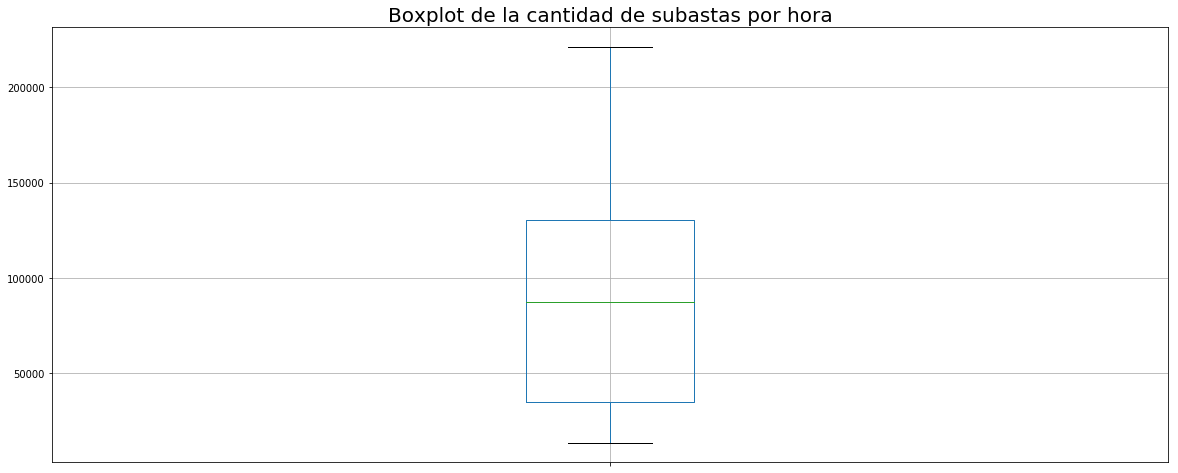

In [21]:
ax = hourly_auctions.plot(kind='box', figsize=(20, 8), title='Boxplot de la cantidad de subastas por hora', grid=True)
ax.set_xlabel('')
ax.set_xticklabels('')
ax.title.set_size(20)

In [22]:
def hourly_auctions_per_day(date, ax=None):
    auctions[date].resample('H').size()\
                  .plot(kind='line', figsize=(20, 8), title=date, ax=ax)

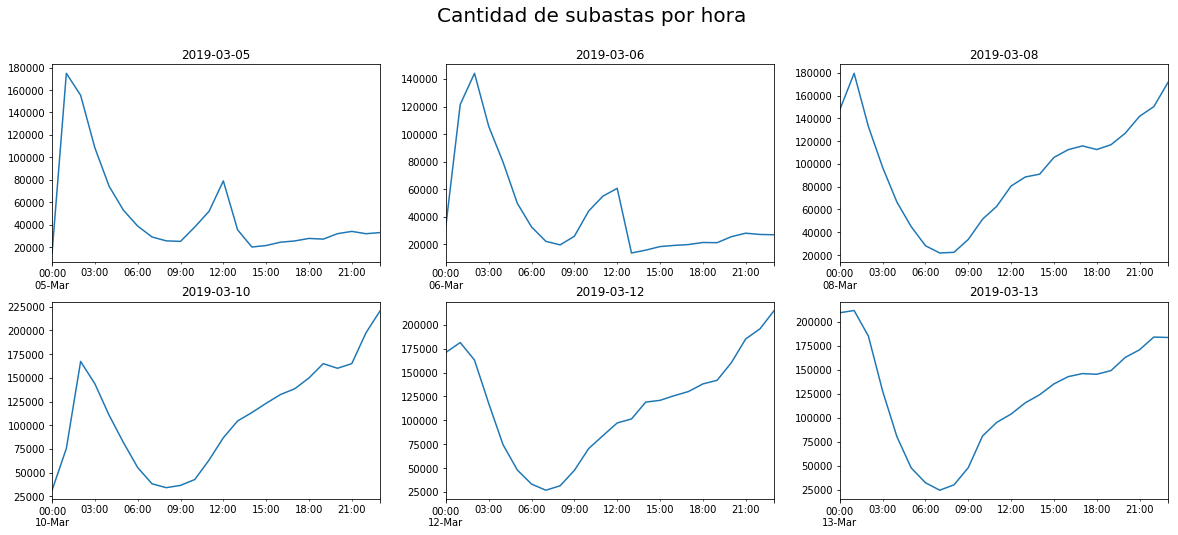

In [23]:
fig, ax_array = plt.subplots(2, 3, figsize=(20,8))
fig.suptitle('Cantidad de subastas por hora', size=20)

dates = ['2019-03-05', '2019-03-06', '2019-03-08', '2019-03-10', '2019-03-12', '2019-03-13']
for day, ax in zip(dates, ax_array.flatten()):
    hourly_auctions_per_day(day, ax)
    ax.set_xlabel('')

[Text(0, 0, '2019-03-05'),
 Text(0, 0, '2019-03-06'),
 Text(0, 0, '2019-03-07'),
 Text(0, 0, '2019-03-08'),
 Text(0, 0, '2019-03-09'),
 Text(0, 0, '2019-03-10'),
 Text(0, 0, '2019-03-11'),
 Text(0, 0, '2019-03-12'),
 Text(0, 0, '2019-03-13')]

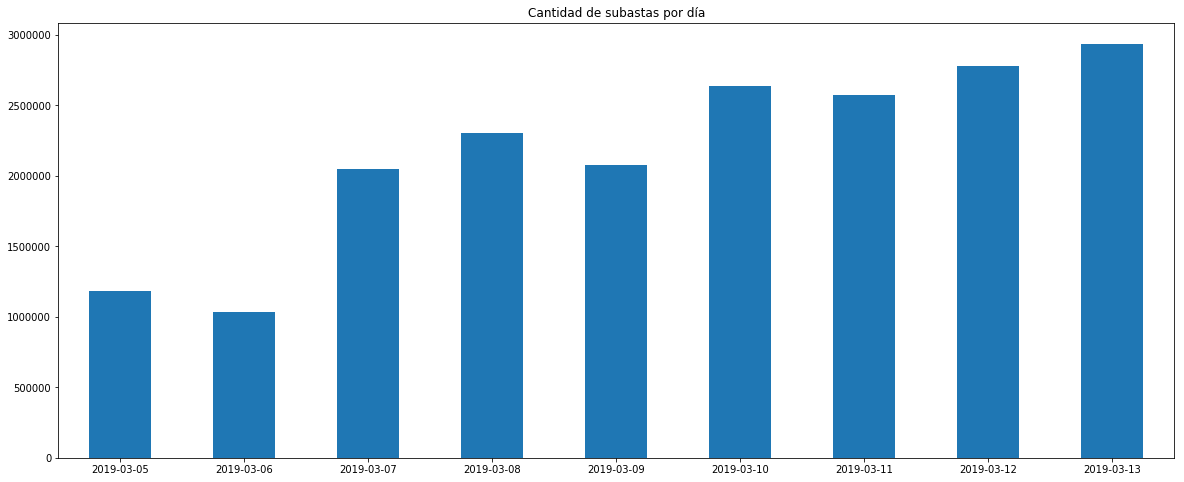

In [24]:
daily_auctions = auctions.resample('D').size()
ax = daily_auctions.plot(kind='bar', figsize=(20, 8), title='Cantidad de subastas por día', rot=0)
ax.set_xlabel('')
ax.set_xticklabels(list(map(str, daily_auctions.index.date)))

Text(0.2, 0.85, 'Plataforma 2 (posiblemente iOS)')

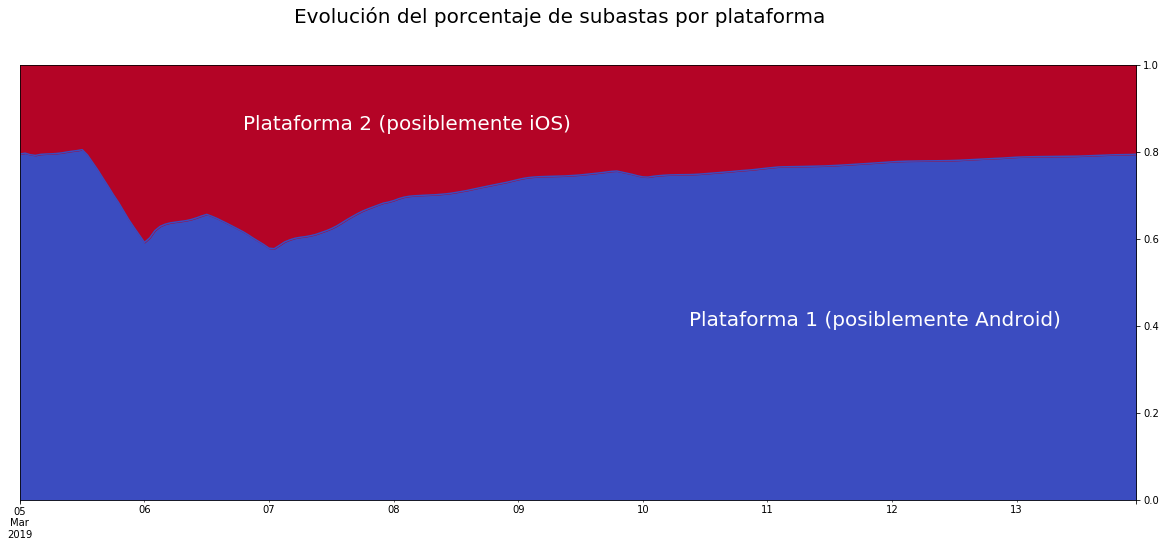

In [25]:
platform_size = auctions.groupby([pd.Grouper(freq='H'), 'platform']).size()
platform_total = platform_size.unstack('platform').cumsum()
row_total = platform_total.sum(axis='columns')
platform_cum_pct = platform_total.div(row_total, axis='index')

ax = platform_cum_pct.plot(kind='area', figsize=(20,8), cmap='coolwarm', xlim=('2019-03-05', None), ylim=(0, 1), legend=False)
ax.figure.suptitle('Evolución del porcentaje de subastas por plataforma', size=20)
ax.set_xlabel('')
ax.yaxis.tick_right()

plot_kwargs = dict(xycoords='axes fraction', size=20)
ax.annotate(xy=(.6, .4), s='Plataforma 1 (posiblemente Android)', color='w', **plot_kwargs)
ax.annotate(xy=(.2, .85), s='Plataforma 2 (posiblemente iOS)', color='w', **plot_kwargs)

In [26]:
# Veamos cuántos device_id diferentes hay
auctions['device_id'].nunique()

206977

In [27]:
# Veamos cuántos dispositivos aparecen menos de 5 veces
(auctions.groupby('device_id').size() <= 5).sum()

64716

In [28]:
# Veamos cuántos dispositivos aparecen más de 3000 veces
(auctions.groupby('device_id').size() >= 3000).sum()

424

Text(0.5, 1.0, 'Histograma de apariciones de dispositivos')

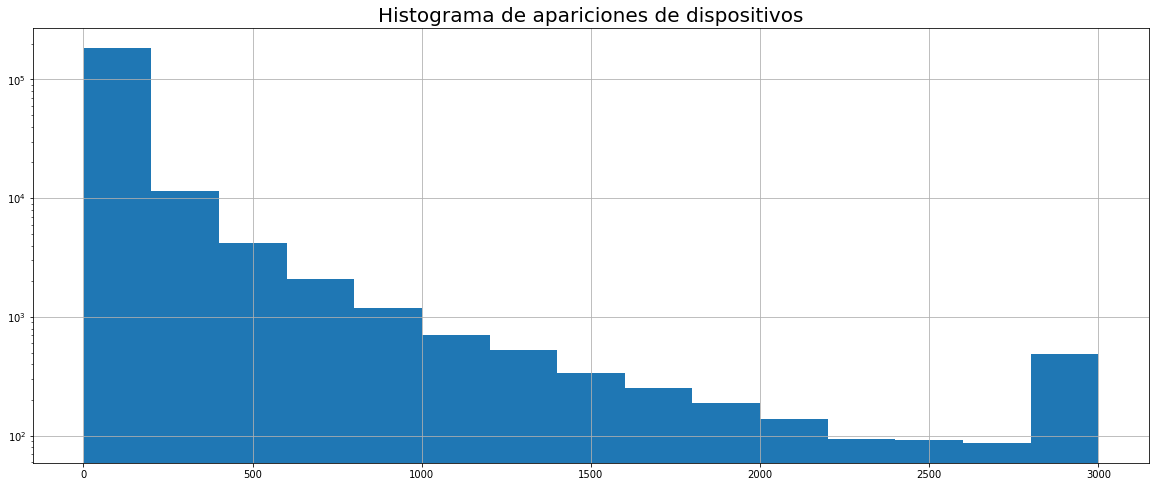

In [29]:
devices_count = auctions.groupby('device_id').size()
devices_count_clipped = devices_count.clip(lower=0, upper=3000)
ax = devices_count_clipped.hist(bins=15, log=True, figsize=(20,8))
ax.set_title('Histograma de apariciones de dispositivos', size=20)